In [ ]:
# installing matplotlib
pip install matplotlib

In [ ]:
# IMPORTS
import json
import matplotlib.pyplot as plt

In [121]:
# MACRO DEFINITIONS
# Required data centers are given for analysis purpose. And for question 2.b we used only wireless tags, not ETHERNET
analysis_data_centers = ['8.208.40.164 Alibaba London', '47.88.111.29 Alibaba SanJose', '103.8.174.238 AWS Sydney', '23.248.185.157 UCloud Lagos', '23.248.184.34 UCloud Dubai', '134.70.116.1 Oracle Montreal', '108.61.212.117 Vultr Sydney']
analysis_data_tags = ['LTE', 'SAT', 'WIFI']

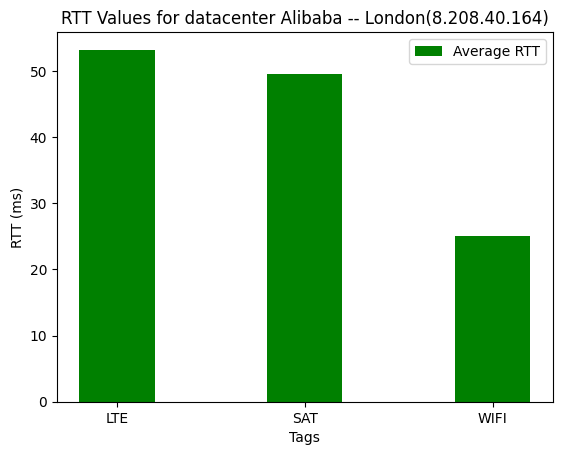

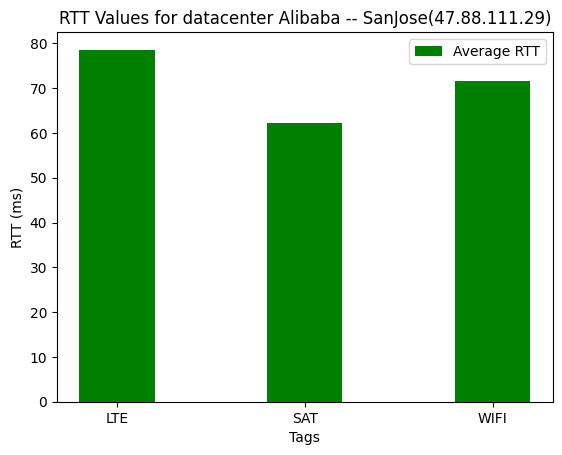

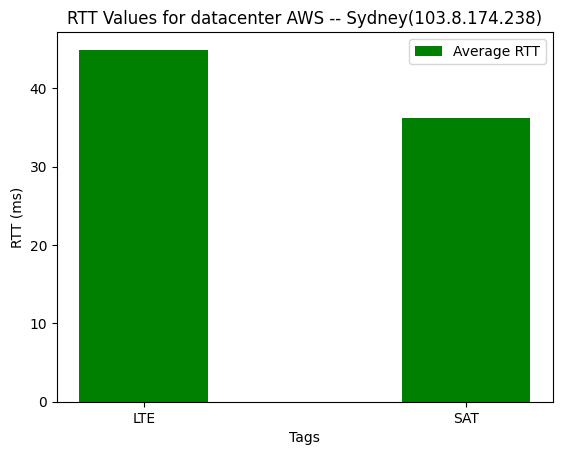

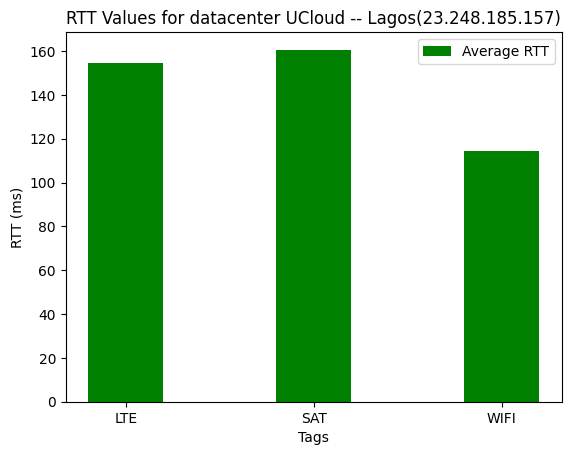

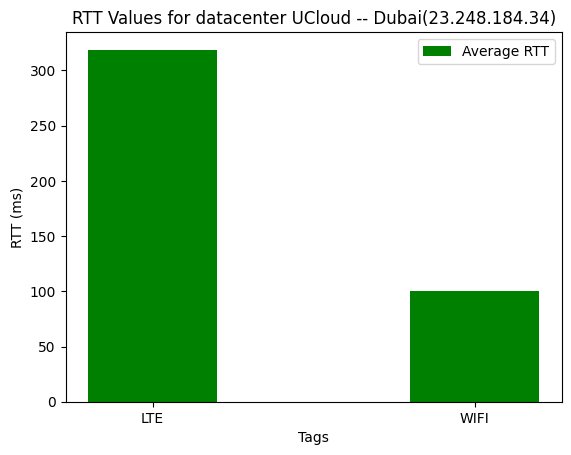

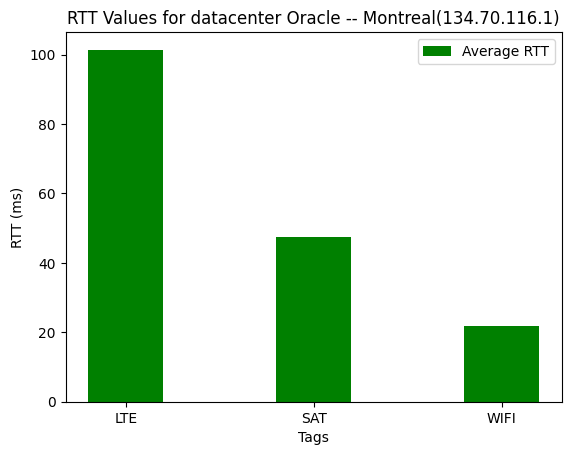

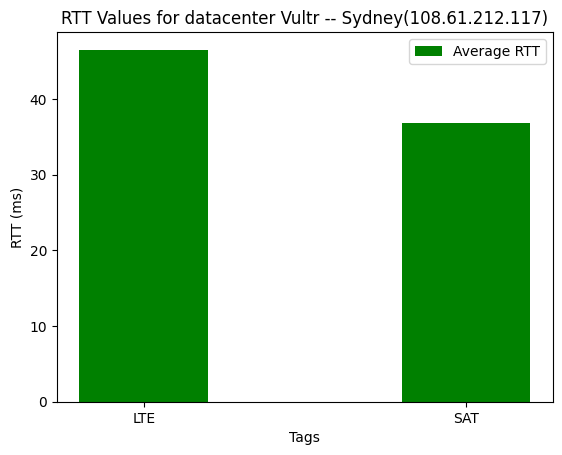

In [122]:
# CREATE ANALYSIS GRAPHS
# It will iterate over all data centers and tags (SAT, WIFI and LTE), and show RTTs of (Average) each data center in bar graph
for each_data_center in analysis_data_centers:
    data_center_name = each_data_center.split(' ')[1] + ' -- ' + each_data_center.split(' ')[2]
    categories = []
    avg_values = []
    
    for each_data_tag in range(len(analysis_data_tags)):
        total_rtt = 0.0
        total_request_count = 0
        try: 
            with open('./Question2_Data/' + each_data_center.split(' ')[0] + '_' + analysis_data_tags[each_data_tag] + '.json', 'r') as file:
                json_data = json.load(file)

                for each_probe_result in json_data:
                    rtt_value_of_probe = 0.0
                    for each_packet in each_probe_result['result']:
                        if 'x' in each_packet or 'error' in each_packet:
                            continue
                        else:
                            rtt_value_of_probe += each_packet['rtt']
                    total_rtt += rtt_value_of_probe / float(len(each_probe_result['result']))
                    total_request_count += 1
        except Exception as e:
            continue
        
        categories.append(analysis_data_tags[each_data_tag])
        avg_values.append(total_rtt / float(total_request_count))
    
    bar_width = 0.4
    bar_positions = range(len(categories))
    
    plt.bar(categories, avg_values, width=bar_width, label='Average RTT', color='green')
    
    plt.xlabel('Tags')
    plt.ylabel('RTT (ms)')
    plt.title('RTT Values for datacenter ' + data_center_name + '(' + each_data_center.split(' ')[0] + ")")
    
    plt.legend()

    plt.show()

